Задание.

1. Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas. Оставить только два (наименее разделимых) класса.
Вычислить коварриации между признаками на всей таблице и отдельно по классам (использовать pd.groupby).
Визуализировать распределения классов на всех парах переменных.

2. Выбрать две переменные. Построить и визуализировать (показать разделяющую
кривую) решения методом квадратичного дискриминанта.

3. На двух переменных из п2 вычислить квадратичную разделяющую функцию
непосредственно по оценкам ковариационных матриц и средних (самостоятельно
реализовать метод, не используя готовый). Визуализировать её и сравнить с
решением из п2.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
df['name'] = df.target.map(lambda x : iris.target_names[x])
# Оставляем два класса
df = df.loc[df['target']!=0]
# Смотрим, что получилось:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

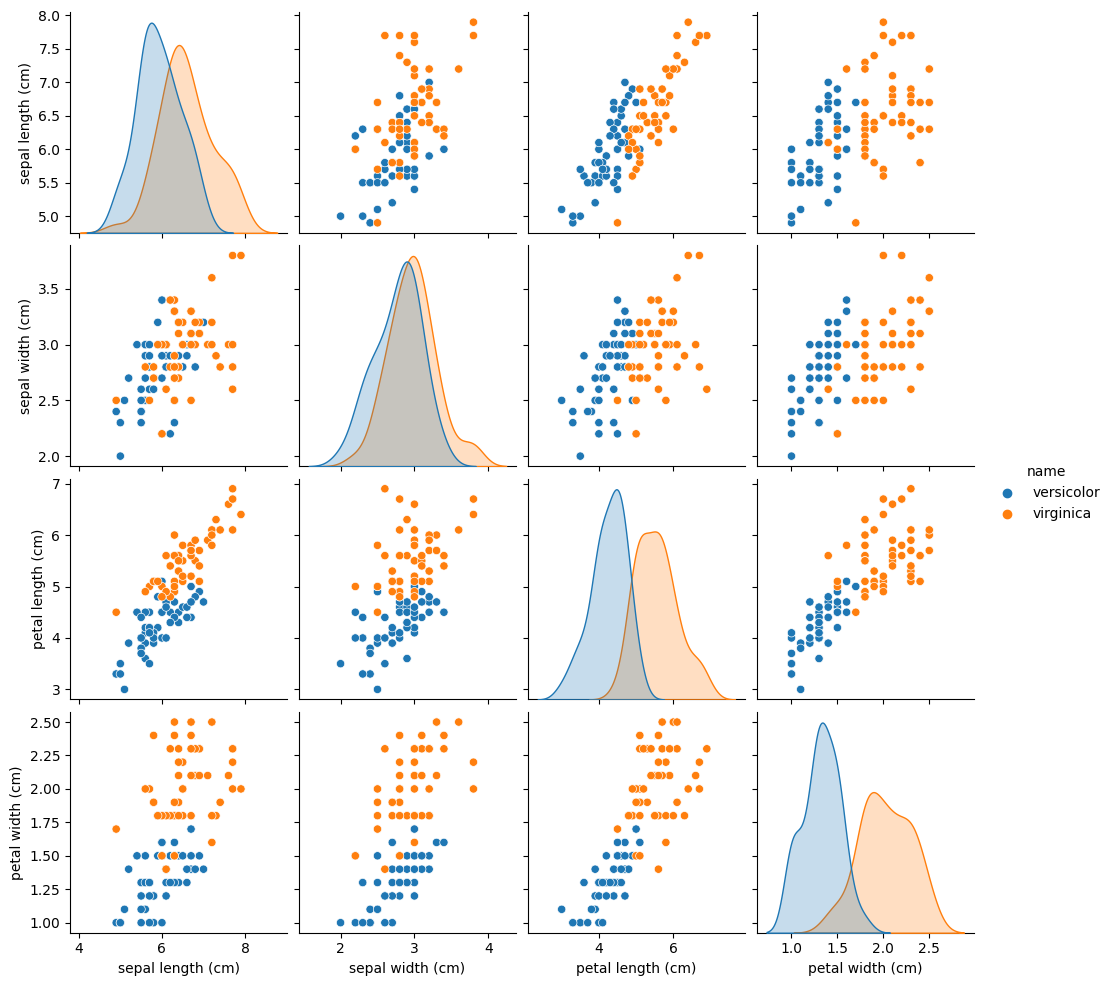

In [3]:
sns.pairplot(df.iloc[:,[0,1,2,3,5]], hue = 'name')

In [4]:
cov = df.groupby(['name','target']).cov()
cov

sepal length (cm)  sepal width (cm)  \
name       target                                                          
versicolor 1      sepal length (cm)           0.266433          0.085184   
                  sepal width (cm)            0.085184          0.098469   
                  petal length (cm)           0.182898          0.082653   
                  petal width (cm)            0.055780          0.041204   
virginica  2      sepal length (cm)           0.404343          0.093763   
                  sepal width (cm)            0.093763          0.104004   
                  petal length (cm)           0.303290          0.071380   
                  petal width (cm)            0.049094          0.047629   

                                     petal length (cm)  petal width (cm)  
name       target                                                         
versicolor 1      sepal length (cm)           0.182898          0.055780  
                  sepal width (cm)            0.082653          0.041204  
                  petal length (cm)           0.220816          0.073102  
                  petal width (cm)            0.073102          0.039106  
virginica  2      sepal length (cm)           0.303290          0.049094  
                  sepal width (cm)            0.071380          0.047629  
                  petal length (cm)           0.304588          0.048824  
                  petal width (cm)            0.048824          0.075433

In [5]:
mean = df.groupby(['name','target']).mean()
mean

,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
name,target,,,,
versicolor,1,5.936,2.770,4.260,1.326
virginica,2,6.588,2.974,5.552,2.026


In [6]:
# функция строит график произвольной функции f от двух переменных.
# Агрумент функции f задаётся в виде массива из двух столбцов

def plot_contours(ax, f, x_min,x_max,y_min,y_max, h=.02):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = f(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    return out

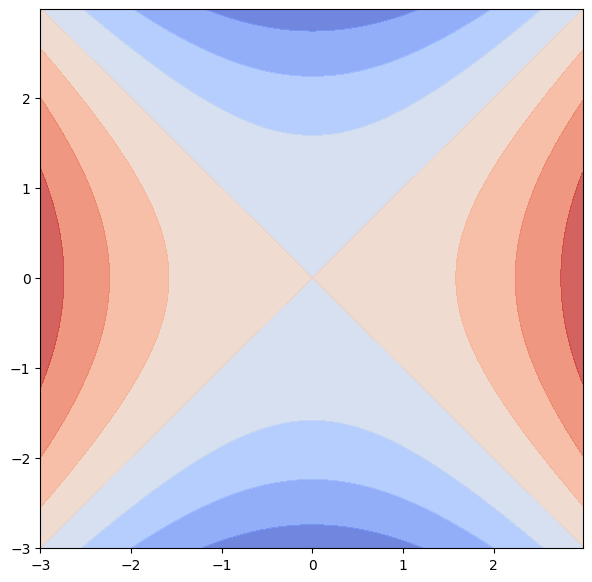

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(7,7))

# Для примера нарисуем гиперболоид
plot_contours(ax,lambda x: x[:,0]**2 - x[:,1]**2, -3,3,-3,3)

C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


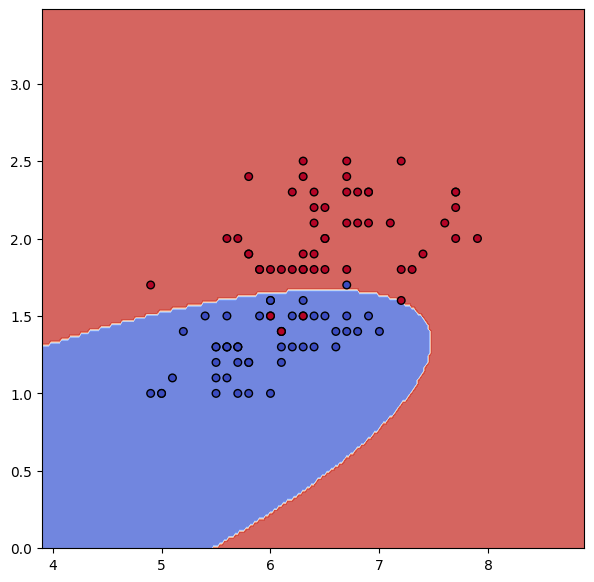

In [8]:
# Воспользуемся библиотечным классификатором

# Выбираем две любые переменные
X = df.iloc[:,[0,3]]
y = df['target']

clf = QuadraticDiscriminantAnalysis()
clf.fit(X,y)

fig, ax = plt.subplots(1, 1,figsize=(7,7))

plot_contours(ax,clf.predict,X.iloc[:,0].min()-1,X.iloc[:,0].max()+1,X.iloc[:,1].min()-1,X.iloc[:,1].max()+1)

ax.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')    

C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


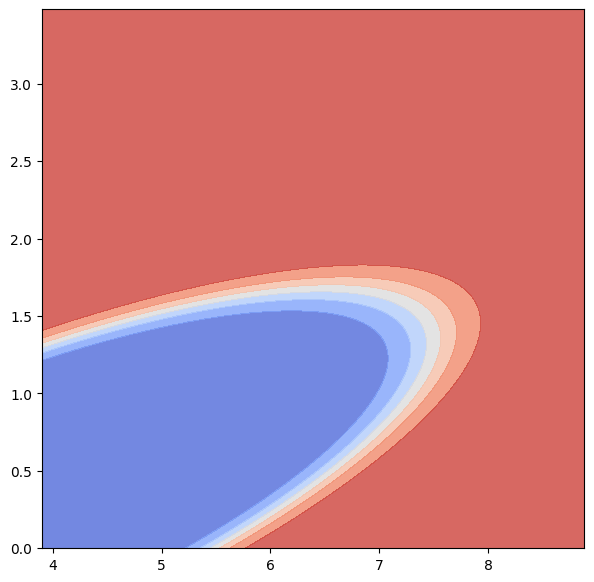

In [10]:
# Требуется построить такую диаграмму, не пользуясь библиотечными классификаторами

fig, ax = plt.subplots(1, 1,figsize=(7,7))

plot_contours(ax,lambda x: clf.predict_proba(x)[:,1],
              X.iloc[:,0].min()-1,X.iloc[:,0].max()+1,X.iloc[:,1].min()-1,X.iloc[:,1].max()+1)

#(X.iloc[:,0],X.iloc[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')    